In [1]:
import matplotlib.pyplot as plt
import json
import math
import numpy as np
import statistics
from plot_func import fivepl, expfunc
from plot_func import plot_kgw_gamma_1, plot_ts_valid, plot_ts_good_ckpts, plot_synthid_layer_8

colors = ['lightsteelblue','blue', 'purple', 'red']
title = ['Empirical FPR=0.1%', 'Empirical FPR=1%', 'z avg']

# April14 Beam Search. Top k sampling. Generation Diversity.

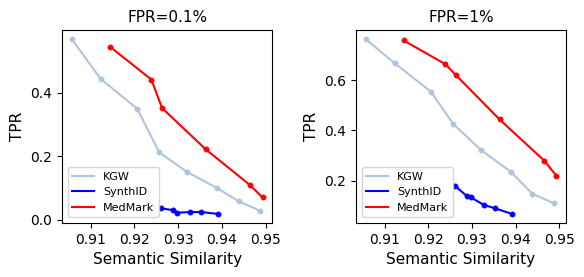

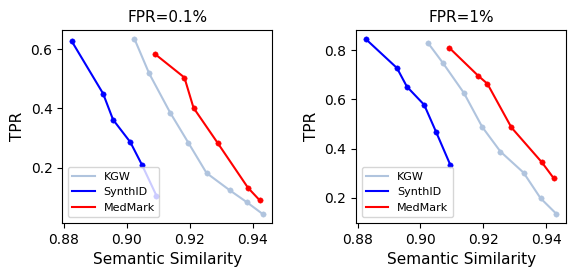

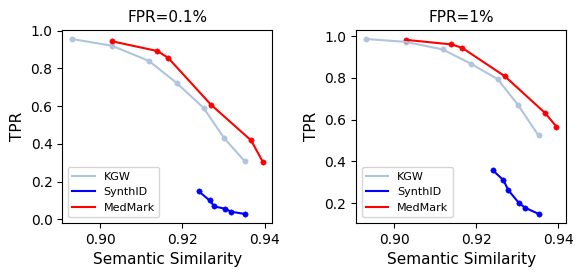

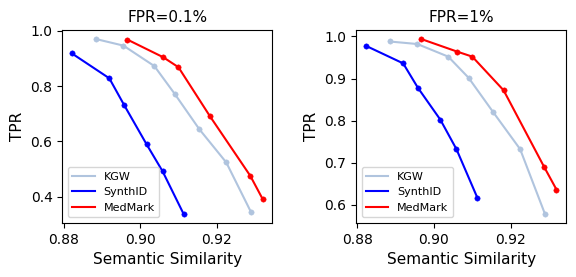

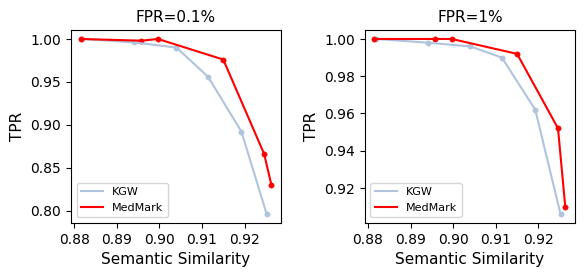

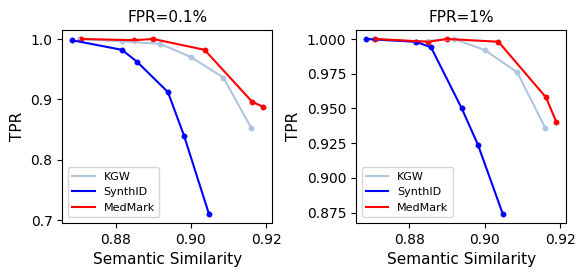

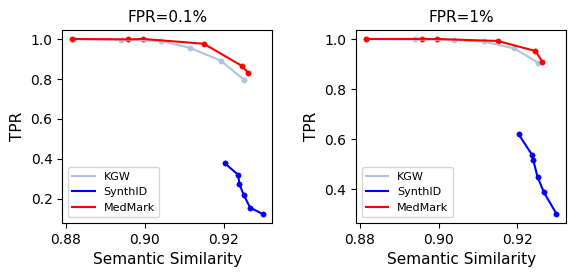

In [2]:
settings = [
    [50, 0.5, False],
    [50, 1.0, False],
    [100, 0.5, False],
    [100, 1.0, False],
    [200, 0.5, False],
    [200, 1.0, False],
    [200, 0.5, True],
]

for length, temp, seperate in settings:
    plt_cnt = 2
    fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))

    split = 'test'
    model_name = 'mistral'
    gen_seed=42

    if length == 100:
        kgw_delta = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
        if model_name == 'mistral':
            kgw_delta = kgw_delta[1:] + [7.0]
    elif length == 50:
        kgw_delta = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
    elif length == 200:
        kgw_delta = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5] 
    kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]

    gen_params = dict(key_id=0, temp=temp, length=length, split=split, model_name=model_name, gen_seed=gen_seed, cross=False)

    plot_kgw_gamma_1(ax, kgw_delta, plot_curve=True, **gen_params)

    # num_leaves = 2, 3, 4, 5, 7, 10, 15, 50 and 1000,
    # layers = 2, 3, 4, 6, 8, 10
    # params = [[2,2],[4,2],[8,2],[16,2],[64,2]]
    # plot_synthid_layer_8(ax, params, plot_curve=True, **gen_params)

    if temp != 0.5 or length != 200 or seperate == True:
        params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
        plot_synthid_layer_8(ax, params, plot_curve=True, **gen_params)

    ckpt_lists = ['gumbel_0.1_4.0/3e-4_100/400', 'gumbel_0.1_4.5/1e-3_100/200', 'gumbel_0.1_5.0/2e-3_100/500',\
                'gumbel_0.1_5.5/2.5e-3_100/600', 'gumbel_0.1_6.0/2.5e-3_100/400', 'gumbel_0.1_6.5/2.5e-3_100/300']   
    plot_ts_good_ckpts(ax, ckpt_lists, plot_curve=True, **gen_params)


    plt.subplots_adjust(wspace=0.4)  
    plt.subplots_adjust(hspace=0.4) 
    if seperate == True:
        plt.savefig(f"figures/HealthSearchQA_{model_name}_len_{length}_temp_{temp}_seperate.png", bbox_inches='tight', dpi=300)
    else:
        plt.savefig(f"figures/HealthSearchQA_{model_name}_len_{length}_temp_{temp}.png", bbox_inches='tight', dpi=300)


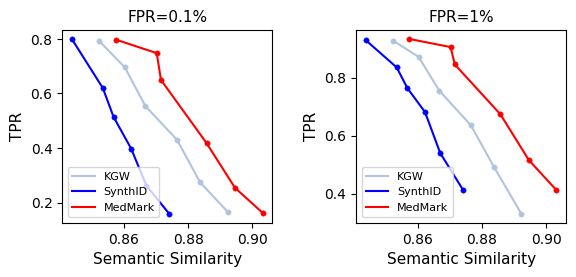

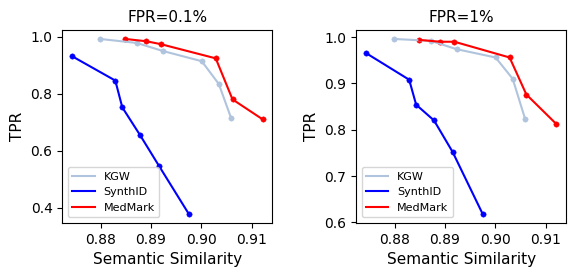

In [3]:
for dataset in ["radiology", "clinical_notes"]:
    kgw_delta = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
    kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]

    plt_cnt = 2
    if plt_cnt == 3:
        fig, ax = plt.subplots(1,3, figsize=(10, 2.5))
    elif plt_cnt == 2:
        fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))

    split = 'test'
    model_name = 'mistral'
    length = 50 if dataset == "radiology" else 200
    temp = 1.0
    gen_seed=42

    gen_params = dict(key_id=0, dataset=dataset, temp=temp, length=length, split=split, model_name=model_name, gen_seed=gen_seed, cross=False)

    plot_kgw_gamma_1(ax, kgw_delta, plot_curve=True, **gen_params)

    params = [[4,8], [5,8], [6,8], [7,8], [8,8], [10,8]]
    plot_synthid_layer_8(ax, params, plot_curve=True, **gen_params)
    
    ckpt_lists = ['gumbel_0.1_4.0/3e-4_100/400', 'gumbel_0.1_4.5/1e-3_100/200', 'gumbel_0.1_5.0/2e-3_100/500', \
                'gumbel_0.1_5.5/2.5e-3_100/600', 'gumbel_0.1_6.0/2.5e-3_100/400', 'gumbel_0.1_6.5/2.5e-3_100/300']   
    plot_ts_good_ckpts(ax, ckpt_lists, plot_curve=True, **gen_params)


    plt.subplots_adjust(wspace=0.4)  
    plt.subplots_adjust(hspace=0.4) 
    plt.savefig(f"figures/{dataset}_{model_name}_len_{length}_temp_{temp}.png", bbox_inches='tight', dpi=300)

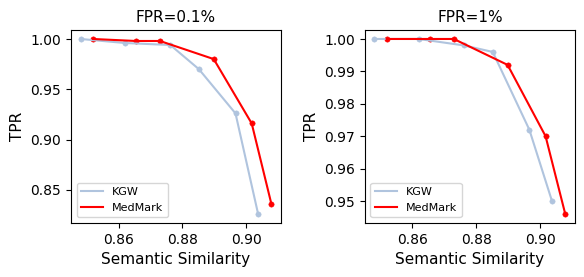

In [4]:
kgw_delta = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]

plt_cnt = 2
if plt_cnt == 3:
    fig, ax = plt.subplots(1,3, figsize=(10, 2.5))
elif plt_cnt == 2:
    fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))

split = 'test'
model_name = 'llama'
length = 100
temp = 1.0

gen_params = dict(key_id=0, temp=temp, length=length, split=split, model_name=model_name, gen_seed=gen_seed, cross=False)
plot_kgw_gamma_1(ax, kgw_delta, plot_curve=True, **gen_params)

ckpt_lists = ['gumbel_0.1_4.0/3e-4_100/400', 'gumbel_0.1_4.5/1e-3_100/200', 'gumbel_0.1_5.0/2e-3_100/500', \
            'gumbel_0.1_5.5/2.5e-3_100/600', 'gumbel_0.1_6.0/2.5e-3_100/400', 'gumbel_0.1_6.5/2.5e-3_100/300']   
plot_ts_good_ckpts(ax, ckpt_lists, plot_curve=True, **gen_params)


plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
plt.savefig(f"figures/{dataset}_{model_name}_len_{length}_temp_{temp}.png", bbox_inches='tight', dpi=300)

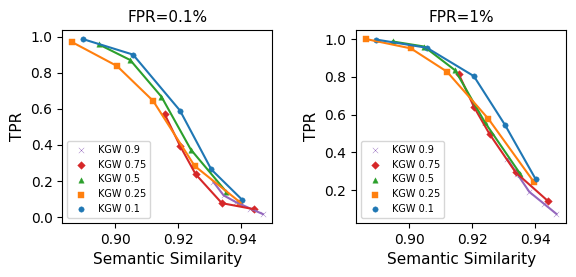

In [5]:
# theoretical FPR

d_0, d_1 = [], []
s = []
title = ['FPR=0.1%', 'FPR=1%', 'z avg']

fig, ax = plt.subplots(1,2, figsize=(6.5, 2.5))
# fig.text(0.5, -0.2, 'Validation Set of HealthSearchQA', ha='center', fontsize=12)

kgw_gamma =  [0.1] * 5 + [0.25] * 5 + [0.5] * 5 + [0.75] * 5 + [0.9] * 5
kgw_delta =  [ 3.0, 4.0, 5.0, 6.0,7.0] + [2.0, 3.0, 4.0, 5.0, 6.0] + [2.0, 3.0, 4.0, 5.0, 6.0] + [2.0, 3.0, 4.0, 5.0, 6.0] + [4.0,5.0, 6.0, 7.0, 8.0]
# kgw_gamma =  [0.1] * 4 + [0.25] * 4+ [0.5] * 4+ [0.75] * 4 + [0.9] * 4
# kgw_delta = [2.0, 4.0, 6.0, 8.0] +  [2.0, 4.0, 6.0, 8.0] +  [2.0, 4.0, 6.0, 8.0] + [2.0, 4.0, 6.0, 8.0] + [2.0, 4.0, 6.0, 8.0] 

kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]
# [str(format(1.0 + 1 * i, '.1f')) for i in range(5)] * 2 + [str(format(2.0 + 1 * i, '.1f')) for i in range(5)] 
z_avg_list = []
cnt = 99


for gamma, delta in zip(kgw_gamma, kgw_delta):
	fpr = json.load(open(f"FPR/KGW/len_100/{str(gamma)}/result.json"))
	z_score_0 = fpr["emp_thres_0.1%"]
	z_score_1 = fpr["emp_thres_1%"]
	file_name = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_1.0/valid/text/mistral_{gamma}_{delta}.json_pp"
	with open(file_name, "r") as f:
		data = [json.loads(x) for x in f.read().strip().split("\n")]
	STS = statistics.mean([val['STS'] for val in data])
	z_score_list = [val['z_wm'] for val in data]
	thres_0 = sum([1 for val in z_score_list if val > z_score_0]) / len(z_score_list)
	thres_1 = sum([1 for val in z_score_list if val > z_score_1]) / len(z_score_list)
	z_avg = statistics.mean(z_score_list)
	d_0.append(thres_0)
	d_1.append(thres_1)
	s.append(STS)
	z_avg_list.append(z_avg)

colors = ['lightsteelblue','blue', 'purple', 'red','pink']

th_list = [0,1]
x_list = [s, s, s]
y_list = [d_0, d_1, z_avg_list]
markers = ['o', 's', '^', 'D', 'x']  # circle, square, triangle_up, diamond, x

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for ax_id in range(2):
    l_1 = sum([1 for val in kgw_gamma if val == 0.1])
    l_25 = sum([1 for val in kgw_gamma if val == 0.25]) + l_1
    l_5 = sum([1 for val in kgw_gamma if val == 0.5]) + l_25
    l_75 = sum([1 for val in kgw_gamma if val == 0.75]) + l_5

    ax[ax_id].scatter(x_list[ax_id][l_75:], y_list[ax_id][l_75:], s=15, color=colors[4], marker=markers[4], linewidths=0.3, label="KGW 0.9")
    ax[ax_id].plot(x_list[ax_id][l_75:], y_list[ax_id][l_75:], color=colors[4]) 
    ax[ax_id].scatter(x_list[ax_id][l_5:l_75], y_list[ax_id][l_5:l_75], s=15, color=colors[3], marker=markers[3], linewidths=0.3, label="KGW 0.75")
    ax[ax_id].plot(x_list[ax_id][l_5:l_75], y_list[ax_id][l_5:l_75], color=colors[3]) 
    ax[ax_id].scatter(x_list[ax_id][l_25:l_5], y_list[ax_id][l_25:l_5], s=15, color=colors[2], marker=markers[2], linewidths=0.3, label="KGW 0.5")
    ax[ax_id].plot(x_list[ax_id][l_25:l_5], y_list[ax_id][l_25:l_5], color=colors[2]) 
    ax[ax_id].scatter(x_list[ax_id][l_1:l_25], y_list[ax_id][l_1:l_25], s=15, color=colors[1], marker=markers[1], linewidths=0.3, label="KGW 0.25")
    ax[ax_id].plot(x_list[ax_id][l_1:l_25], y_list[ax_id][l_1:l_25], color=colors[1]) 
    ax[ax_id].scatter(x_list[ax_id][:l_1], y_list[ax_id][:l_1], s=15, color=colors[0], marker=markers[0], linewidths=0.3, label="KGW 0.1")
    ax[ax_id].plot(x_list[ax_id][:l_1], y_list[ax_id][:l_1], color=colors[0]) 
    ax[ax_id].set_ylabel('TPR', fontsize=11)
    ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
    ax[ax_id].set_title(title[ax_id], fontsize=11)
    ax[ax_id].legend(loc="lower left", fontsize=7)

plt.subplots_adjust(wspace=0.4)  
plt.subplots_adjust(hspace=0.4) 
plt.savefig(f"figures/gamma.png", bbox_inches='tight', dpi=300)

In [ ]:
# # Number of params

# ckpt_path = "/data2/mingjia/med_watermark/ckpt/Mistral/gumbel_0.1_4.0/3e-4_100/fp16_400.pth"
# import torch
# checkpoint = torch.load(ckpt_path)

# if isinstance(checkpoint, dict) and 'delta_state_dict' in checkpoint:
#     state_dict = checkpoint['delta_state_dict']
# else:
#     state_dict = checkpoint

# total_params = sum(p.numel() for p in state_dict.values())
# print(f"Total parameters: {total_params:,}")

Total parameters: 4,458,753


/tmp/ipykernel_485110/786873289.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path)


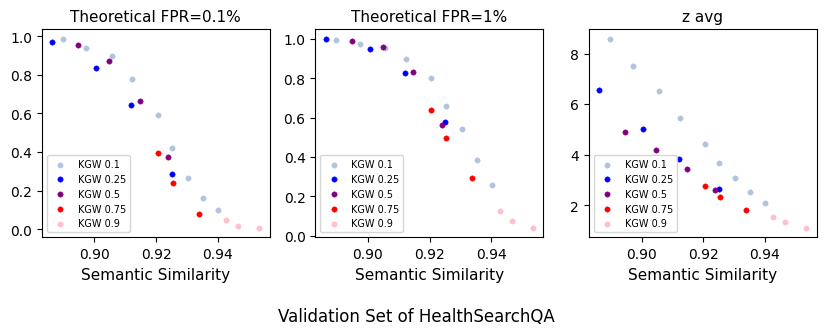

In [18]:
d_0, d_1 = [], []
s = []
title = ['Theoretical FPR=0.1%', 'Theoretical FPR=1%', 'z avg']

fig, ax = plt.subplots(1,3, figsize=(10, 2.7))
fig.text(0.5, -0.2, 'Validation Set of HealthSearchQA', ha='center', fontsize=12)

kgw_gamma =  [0.1] * 9 + [0.25] * 4 + [0.5] * 4 + [0.75] * 3 + [0.9] * 3
kgw_delta =  [ 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0] + [3.0, 4.0, 5.0, 6.0] + [3.0, 4.0, 5.0, 6.0] + [3.0, 4.0, 5.0] + [3.0, 4.0, 5.0]
kgw_delta = [str(format(val, '.1f')) for val in kgw_delta]
# [str(format(1.0 + 1 * i, '.1f')) for i in range(5)] * 2 + [str(format(2.0 + 1 * i, '.1f')) for i in range(5)] 
kgw_z_score_0 = [21] * 9 + [40] * 4 + [66] * 4 + [88] * 3 + [98] * 3
kgw_z_score_1 = [18] * 9 + [36] * 4 + [62] * 4 + [85] * 3 + [96] * 3
z_avg_list = []
cnt = 99


for gamma, delta, z_score_0, z_score_1 in zip(kgw_gamma, kgw_delta, kgw_z_score_0, kgw_z_score_1):
	fpr = json.load(open(f"FPR/KGW/len_100/{gamma}/result.json"))
	z_score_0 = fpr["emp_thres_0.1%"]
	z_score_1 = fpr["emp_thres_1%"]
	# z_score_0 = (z_score_0 - gamma * cnt) / math.sqrt(cnt * gamma * (1 - gamma)) - 0.001
	# z_score_1 = (z_score_1 - gamma * cnt) / math.sqrt(cnt * gamma * (1 - gamma)) - 0.001
	file_name = f"HealthSearchQA/gen_seed_42/key0/KGW/len_100_temp_1.0/valid/text/mistral_{gamma}_{delta}.json_pp"
	with open(file_name, "r") as f:
		data = [json.loads(x) for x in f.read().strip().split("\n")]
	STS = statistics.mean([val['STS'] for val in data])
	z_score_list = [val['z_wm'] for val in data]
	thres_0 = sum([1 for val in z_score_list if val > z_score_0]) / len(z_score_list)
	thres_1 = sum([1 for val in z_score_list if val > z_score_1]) / len(z_score_list)
	z_avg = statistics.mean(z_score_list)
	d_0.append(thres_0)
	d_1.append(thres_1)
	s.append(STS)
	z_avg_list.append(z_avg)

colors = ['lightsteelblue','blue', 'purple', 'red','pink']

th_list = [0,1]
x_list = [s, s, s]
y_list = [d_0, d_1, z_avg_list]

for ax_id in range(3):
	l_1 = sum([1 for val in kgw_gamma if val == 0.1])
	l_25 = sum([1 for val in kgw_gamma if val == 0.25]) + l_1
	l_5 = sum([1 for val in kgw_gamma if val == 0.5]) + l_25
	l_75 = sum([1 for val in kgw_gamma if val == 0.75]) + l_5
	ax[ax_id].scatter(x_list[ax_id][:l_1], y_list[ax_id][:l_1], s=15, color=colors[0], linewidths=0.3, label="KGW 0.1")
	ax[ax_id].scatter(x_list[ax_id][l_1:l_25], y_list[ax_id][l_1:l_25], s=15, color=colors[1], linewidths=0.3, label="KGW 0.25")
	ax[ax_id].scatter(x_list[ax_id][l_25:l_5], y_list[ax_id][l_25:l_5], s=15, color=colors[2], linewidths=0.3, label="KGW 0.5")
	ax[ax_id].scatter(x_list[ax_id][l_5:l_75], y_list[ax_id][l_5:l_75], s=15, color=colors[3], linewidths=0.3, label="KGW 0.75")
	ax[ax_id].scatter(x_list[ax_id][l_75:], y_list[ax_id][l_75:], s=15, color=colors[4], linewidths=0.3, label="KGW 0.9")

	ax[ax_id].set_xlabel('Semantic Similarity', fontsize=11)
	ax[ax_id].set_title(title[ax_id], fontsize=11)
	ax[ax_id].legend(loc="lower left", fontsize=7)

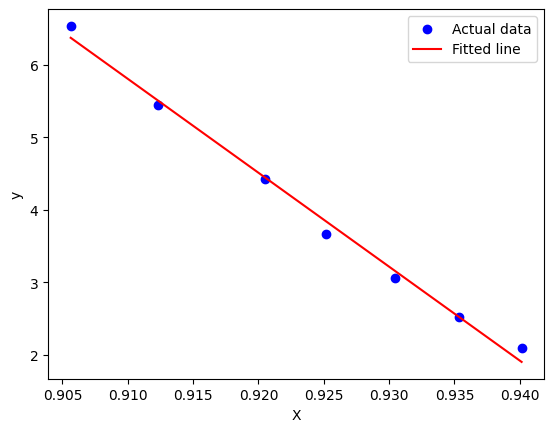

In [65]:
z = []
s = []
title = ['Theoretical FPR=0.1%', 'Theoretical FPR=1%']

kgw_gamma =  [0.1] * 7 
kgw_delta = [3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
for gamma, delta, z_score_0, z_score_1 in zip(kgw_gamma, kgw_delta, kgw_z_score_0, kgw_z_score_1):
	entry = json.load(open(f"HealthSearchQA/KGW/len_100/valid/mistral_{gamma}_{delta}.json"))
	z.append(entry['z']['avg'])
	s.append([entry['STS']])

colors = ['lightsteelblue','blue', 'purple', 'red']

# plt.scatter(s, z, s=15, color=colors[0], linewidths=0.3, label="KGW 0.1")

from sklearn.linear_model import LinearRegression

import numpy as np

model = LinearRegression()
model.fit(s, z)

# Make predictions
z_pred = model.predict(s)

# Plot the results
plt.scatter(s, z, color='blue', label='Actual data')   # Scatter plot of actual data
plt.plot(s, z_pred, color='red', label='Fitted line')  # Regression line
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [66]:
model.coef_, model.intercept_

(array([-129.42924929]), np.float64(123.58478506832998))